In [3]:
## Imported librarys

import numpy as np # Used for generating the Dataset Arrays
import os # Used for generating file names and dictionarys. 
from os.path import isfile, join # Used for generating file names and dictionarys. 
import matplotlib.pyplot as plt

from itertools import groupby

 
def NumberCheck(Input): # Checks that the value inputted it actually an integer. If not continues to ask until a Integer is inputted. 
    
    for ListItem in Input: # cycles through all the seperate elements in the list argument
        try:
            int(ListItem) # try to see if the value can be converted to a integer. If it can the function cycles to the next item in the list. 
            
        except ValueError: # if the above returns an error it asks again for the user to input a correct number. It then asks for a whole new list and re-initilizes the checking function. It then outputs the updated/corrected input list. 
            ColumnInputString = input("A non-integer or space was inputted. Numbers seperated by spaces only! Try again ->   ")
            ColumnsToProcess = ColumnInputString.split(" ")
            Input = NumberCheck(ColumnsToProcess) # performs the NumberCheck function again to confirm that a number was inputted the second time. 
    
    return Input

# FILE SELECTION - CSV Data Location / List. Generates list of files within the defined folder. 

# Constants

CsvDelim = ";" # delimter within cvs
InputFolder = "./CSVInputFiles" # input file path

# Find and print a list of files within the input folder

print(f"Files located within {InputFolder}") # Header
FileList = [f for f in os.listdir(InputFolder) if isfile(join(InputFolder, f))] # look through the folder specified in the variable above and generate a list of all the files within that folder. 
InputFolder = InputFolder[2:] + "/" # converting the file path input constant to work correctly with susequent open/import requests
FileList = [InputFolder + s for s in FileList] # Adds the filepath to the file name so it can be easily used by following import/open functions to all the values in the list. (for each list element in FileList (S), add the element to the end of the ImportFolder string. Return as a list element)


for A2, A3 in enumerate(FileList): # printing the csv datasets within the folder - makes it easier to select the desired file
    print(f"File {A2+1} = {A3[14:]}") # A2+1 is to increase the index number by 1, so that the first file is not file 0
    

Files located within ./CSVInputFiles
File 1 = V16.csv
File 2 = V20.csv


<>:332: SyntaxWarning: invalid escape sequence '\%'
<>:332: SyntaxWarning: invalid escape sequence '\%'
C:\Users\RB\AppData\Local\Temp\ipykernel_18772\2561935846.py:332: SyntaxWarning: invalid escape sequence '\%'
  plt.savefig("OutputPlots\%s.pdf"%(Filename))


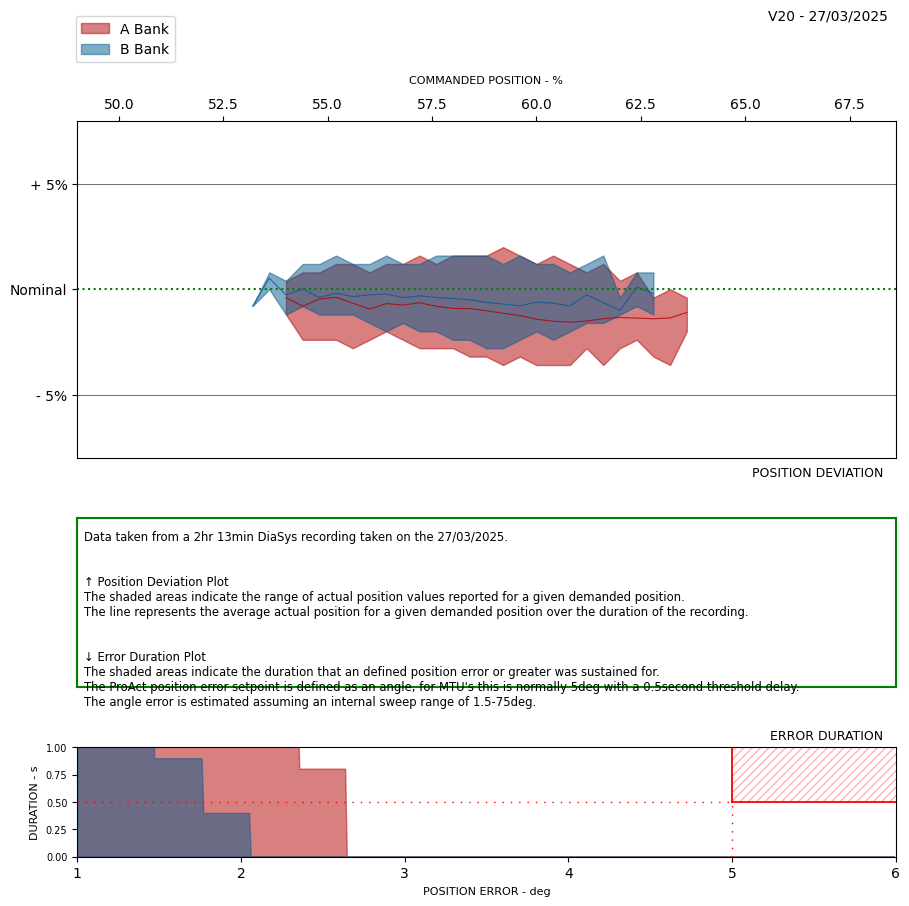

In [4]:
TargetFile = input("\nWhich file to process? Input a integer value between 1 & %s  ->   "%(len(FileList)))  # asks the question about which file to process. Wants an input. 

#TargetFile = "1" #Default for test purposes

TargetFile = NumberCheck(TargetFile) # Checking the value inputted is a number. 
TargetFile = int(TargetFile)-1 # the minus one is to convert the inputted value (converted into an int), 1, 2 etc into a index position for the list. 
if TargetFile > (len(FileList)-1) or TargetFile == -1: # Checking that the value is actually a legit value, ie that there is a list index position for the number inputted or that 0 hasnt been inputted
    print("The number entered is greater than the number of dataset files available")
    input("Press any key to exit  ") # A way to pause the program and ensure the user understands why the program is about to stop. 
    quit() # Stops the program. 

OriginalFile = open("./%s"%(FileList[TargetFile]), "r") # opens the target file
OriginalHeader = OriginalFile.readline() # read a line from the document. Python behind the scenes knows the read the next line when its next run
OriginalHeader = OriginalHeader.strip() # the strip removes the return for new line (/n) from the string.
OriginalFile.close() # close the file. must do. 
OriginalHeader = OriginalHeader.split(";") # split the string into a list using the sepeartor ;
OriginalHeader = [C1[1:-1] for C1 in OriginalHeader] #removes the first and last element for each string element in the list. ie removes ""

TimeArray = np.genfromtxt("./%s"%(FileList[TargetFile]),dtype=str, delimiter=CsvDelim, usecols=0, skip_header=1) # converts the first column (minus the header) into a array of strings. 
SamplePeriodHI = (TimeArray[1][-12:-3]) # extracts one time sample - second and microseconds.
SamplePeriodLow = (TimeArray[0][-12:-3]) # extracts the second time sample
SamplePeriodHI = int(SamplePeriodHI.replace(" ", "")) # acts to replace the space in the extracted string value to no space. turns into a int. 
SamplePeriodLow = int(SamplePeriodLow.replace(" ", ""))
SamplePeriod = int(SamplePeriodHI - SamplePeriodLow) # actually calucate the difference. by including the second value at the front it can cope with the first and second measurement occuring either side of a second increment. 
SamplePeriod = float(SamplePeriod/1000000) # converting
NumberOfSamples = TimeArray.shape # find shape of the array to calculate the number of samples it contains
TotalTimeLength = int(NumberOfSamples[0]*SamplePeriod)# generating the length in time of the sample set. (relative to zero)
Hours, Mins = divmod(TotalTimeLength,3600) # Calculate the time in hours taken. the remainder being converted to mins below. 
Mins = int(Mins/60)
Date = TimeArray.copy()[1][1:11] # this function extracts the date to get added to the plot legend. 
Day = Date[-2:]
Month = Date[5:7]
Year = Date[0:4]
SweepMinAngle = 1.5
SweepMaxAngle = 75
CalculatedSweep = SweepMaxAngle-SweepMinAngle

ProActA_DiaSysVariable_Desired = "1__1_4550_003_A___Desired_Valve_Position" # defines the column labels to look out for. 
ProActA_DiaSysVariable_Actual = "1__1_4550_002_A___Actual_Valve_Position"

ProActB_DiaSysVariable_Desired = "1__1_4550_103_B___Desired_Valve_Position"
ProActB_DiaSysVariable_Actual = "1__1_4550_102_B___Actual_Valve_Position"

#ProActA_DiaSysVariable_Desired = "1__1_1450_105_Req__throttle_surface_bank_A" # the required throttle position has a resolution of 0.001. Not all recordings will have it. 
#ProActB_DiaSysVariable_Desired = "1__1_1450_110_Req__throttle_surface_bank_B"

ProActA_Enable = False # setting up boolean variables. 
ProActB_Enable = False
MissingDataString = "\n"

try: 
    ProActA_Desired_Index = OriginalHeader.index(ProActA_DiaSysVariable_Desired) # Acts to find the index position of any strings within the list that match the search variable. 
    ProActA_Actual_Index = OriginalHeader.index(ProActA_DiaSysVariable_Actual)
except:
    MissingDataString = "\nThe dataset contains incomplete ProAct A data and is therefore omitted."
else:
    ProActA_Enable = True

try:
    ProActB_Desired_Index = OriginalHeader.index(ProActB_DiaSysVariable_Desired)
    ProActB_Actual_Index = OriginalHeader.index(ProActB_DiaSysVariable_Actual)
except:
    MissingDataString = "\nThe dataset contains incomplete ProAct B data and is therefore omitted."
else:
    ProActB_Enable = True



def DiaSysProcessor(DesiredArray, FeedbackArray, DesiredPosition): # 
    LegitValue = DesiredPosition in DesiredArray # sees if the actual feedback desired position is within the desired array (ie the looping function used to generate the plot)
    if LegitValue == True:
        
        LoopBuffer = FeedbackArray[:][DesiredPosition == DesiredArray] # boolean mask to find all the instances in the desiredposition feedback signal that matches the desired position for the plot. ie extract all the index positions and then apply to the actual position feedback array. basically cut out all the instances the desired position was a certain value. 
        MinFeedback = np.min(LoopBuffer) # finding the min value of the feedback when the desired was a certain value. 
        MaxFeedback = np.max(LoopBuffer)
        AveFeedback = np.ma.average(LoopBuffer).round(2)
        OutputList = [DesiredPosition,MinFeedback,MaxFeedback, AveFeedback]
        return OutputList
        
    
    else:
        pass

def DiaSysErrorDuration(ErrorArray, ErrorSetpoint):
    ErrorLoopBuffer = ErrorArray > ErrorSetpoint
    ErrorLengthBuffer = ([0])
    
    #ErrorLengthBuffer = []
    for k , g in groupby(ErrorLoopBuffer):
        if k == True:
            g = list(g)
            ErrorLengthBuffer.append(len(g))

    ErrorLengthBuffer = np.asarray(ErrorLengthBuffer)
    MaxErrorLengthRaw = int(np.max(ErrorLengthBuffer))
    ErrorTime = round( MaxErrorLengthRaw*SamplePeriod, 4)
    OutputList = [ErrorSetpoint , ErrorTime]
    return OutputList

OutputList = []
ComparisonPostionArray = np.arange(0,100,0.01).round(2) # generating the array for the in function below. ie generate an array of all potential position commands. set to 0.001 due to potentially feeding in the throttle required face ecu value. If speed is an issue, reduce to 0.1 and 2dp.  

ProActA_Processed_ArrayData = 0
ProActB_Processed_ArrayData = 0

ErrorDurationComparisonArray = np.arange(1,6,0.01).round(2)
ErrorDurationList = []

if ProActA_Enable == True:

    ProActA_Desired_Data = np.loadtxt("./%s"%(FileList[TargetFile]), delimiter=CsvDelim, usecols=ProActA_Desired_Index, skiprows=1) # Downloading the array data
    ProActA_Actual_Data = np.loadtxt("./%s"%(FileList[TargetFile]), delimiter=CsvDelim, usecols=ProActA_Actual_Index, skiprows=1)
    ProActA_Error = np.absolute(ProActA_Actual_Data - ProActA_Desired_Data).round(2)
    ProActA_Error = ProActA_Error/(100/CalculatedSweep)
    for D1 in ComparisonPostionArray:
        ProcessorBuffer = DiaSysProcessor(ProActA_Desired_Data,ProActA_Actual_Data,D1)
        if ProcessorBuffer != None:
            OutputList.append(ProcessorBuffer)

    ProActA_Processed_ArrayData = np.asarray(OutputList)
    OutputList.clear()
    #ErrorDurationList.clear()
    for ErrorSetPoint in ErrorDurationComparisonArray:
        ErrorDurationList.append(DiaSysErrorDuration(ProActA_Error, ErrorSetPoint))

    ProActAProcessedErrorDurationArray = np.asarray(ErrorDurationList)

if ProActB_Enable == True:

    ProActB_Desired_Data = np.loadtxt("./%s"%(FileList[TargetFile]), delimiter=CsvDelim, usecols=ProActB_Desired_Index, skiprows=1)
    ProActB_Actual_Data = np.loadtxt("./%s"%(FileList[TargetFile]), delimiter=CsvDelim, usecols=ProActB_Actual_Index, skiprows=1)
    
    ProActB_Error = np.absolute(ProActB_Actual_Data - ProActB_Desired_Data).round(2)
    ProActB_Error = ProActB_Error/(100/CalculatedSweep)
    
    for D1 in ComparisonPostionArray:
        ProcessorBuffer = DiaSysProcessor(ProActB_Desired_Data,ProActB_Actual_Data,D1)
        if ProcessorBuffer != None:
            OutputList.append(ProcessorBuffer)

    ProActB_Processed_ArrayData = np.asarray(OutputList)
    
    ErrorDurationList.clear()
    for ErrorSetPoint in ErrorDurationComparisonArray:
        ErrorDurationList.append(DiaSysErrorDuration(ProActB_Error, ErrorSetPoint))

    ProActBProcessedErrorDurationArray = np.asarray(ErrorDurationList)

Nominal = 10

MaxErrorValueFound = 0
def AutoScaler(Commanded,Feedback, MaxErrorValueFound):
    ErrorArray = abs(Feedback - Commanded) # calcualte the error - ensure a postiive number
    Error = np.max(ErrorArray) # find the max error in the array. 
    return round(max(Error, MaxErrorValueFound),1) # return whichever is greater, between the previous max value known and the measured error in this comparison. 
  
if ProActA_Enable == True:
    MaxErrorValueFound = AutoScaler(ProActA_Processed_ArrayData[:,0], ProActA_Processed_ArrayData[:,2],MaxErrorValueFound) # used to find if the error between the two argument arrays is greater than any previous error measured. 
    MaxErrorValueFound = AutoScaler(ProActA_Processed_ArrayData[:,0], ProActA_Processed_ArrayData[:,1],MaxErrorValueFound)

if ProActB_Enable == True:
    MaxErrorValueFound = AutoScaler(ProActB_Processed_ArrayData[:,0], ProActB_Processed_ArrayData[:,2],MaxErrorValueFound) # used to find if the error between the two argument arrays is greater than any previous error measured. 
    MaxErrorValueFound = AutoScaler(ProActB_Processed_ArrayData[:,0], ProActB_Processed_ArrayData[:,1],MaxErrorValueFound)

#ScalingFactors = np.loadtxt("Scale.csv", delimiter=",")
ScalingFactors = np.array([[0,3],[3,4],[5,5],[7,7],[9,10]])

ScaleFactor = ScalingFactors[:,1][MaxErrorValueFound >= ScalingFactors[:,0]][-1]
#ScaleFactor = 4


ProActPositionErrorSetpointDeg = 5
#MTULimitPercentage = (100/CalculatedSweep)*ProActPositionErrorSetpointDeg
MTULimitPercentage = 5



def ProActDiaSysPlotFunction(InputArray, ScaleFactor, Nominal, plotcolor, Label):
    ProcessedMaxVarianceData = ((InputArray[:,2]-InputArray[:,0])/ScaleFactor)+Nominal
    ProcessedNegVarianceData = ((InputArray[:,1]-InputArray[:,0])/ScaleFactor)+Nominal
    AveragePlot = ((InputArray[:,3]-InputArray[:,0])/ScaleFactor)+Nominal
    PositionArray = InputArray[:,0] # these are not actually angles but percentage values
    

    ax1.fill_between(PositionArray, ProcessedMaxVarianceData,ProcessedNegVarianceData, color = plotcolor, alpha=0.5, label = Label ) # Generates a filled in area between two curves. alpha is to set the transparency.
    ax1.plot(PositionArray, AveragePlot, color = plotcolor, ls="-", alpha = 0.8, lw=0.8 )
    return np.max(ProcessedMaxVarianceData).round(2), np.min(ProcessedNegVarianceData).round(2)


 

if ProActA_Enable & ProActB_Enable == True:
    PlotAngleRangeMin = max(ProActA_Processed_ArrayData[0,0]-5, ProActB_Processed_ArrayData[0,0]-5)
    PlotAngleRangeMax = max(ProActA_Processed_ArrayData[-1,0]+5,ProActB_Processed_ArrayData[-1,0]+5)
elif ProActA_Enable == True and ProActB_Enable == False:
    PlotAngleRangeMin = ProActA_Processed_ArrayData[0,0]-5
    PlotAngleRangeMax = ProActA_Processed_ArrayData[-1,0]+5
elif ProActA_Enable == False and ProActB_Enable == True:
    PlotAngleRangeMin = ProActB_Processed_ArrayData[0,0]-5
    PlotAngleRangeMax = ProActB_Processed_ArrayData[-1,0]+5
else:
    pass

if PlotAngleRangeMin < 5:
    PlotAngleRangeMin = 0

if PlotAngleRangeMax > 85:
    PlotAngleRangeMax = 100

#PlotAngleRangeMin = 0
#PlotAngleRangeMax = 80



PlotOffset = PlotAngleRangeMin+((PlotAngleRangeMax - PlotAngleRangeMin )/2) # this function really comes into its own if the two lines above are # out and the span is smaller. maybe not much actual use. 

PlotSpan = PlotAngleRangeMax - PlotAngleRangeMin



PlotTitle = input("\nType in the desired Plot Title ->   ")
#PlotTitle = "This is a title in the top right"
if PlotTitle == "":
    Filename = "%s.%s.%s"%(Day, Month, Year)
    PlotTitle = "Data Recorded on %s/%s/%s"%(Day, Month, Year)
    

else:
    Filename = "%s - %s.%s.%s"%(PlotTitle,Day, Month, Year)
    PlotTitle = "%s - %s/%s/%s"%(PlotTitle, Day, Month, Year)
    


fig = plt.figure(figsize=(9.2, 9.2))
gs = fig.add_gridspec(4, 1, height_ratios=[0.15,2, 1,0.65])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[3])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[0])

if ProActA_Enable == True:
    ProActA_Max, ProActA_Min = ProActDiaSysPlotFunction(ProActA_Processed_ArrayData,ScaleFactor, Nominal, "#b30000", "A Bank")
    ax2.fill_between(ProActAProcessedErrorDurationArray[:,0], ProActAProcessedErrorDurationArray[:,1],alpha=0.5, color="#b30000")
else: 
    ProActA_Max = 0
    ProActA_Min = Nominal

if ProActB_Enable == True:
    ProActB_Max, ProActB_Min = ProActDiaSysPlotFunction(ProActB_Processed_ArrayData,ScaleFactor, Nominal, "#045a8d", "B Bank")
    ax2.fill_between(ProActBProcessedErrorDurationArray[:,0], ProActBProcessedErrorDurationArray[:,1],alpha=0.5, color="#045a8d")
else: 
    ProActB_Max = 0
    ProActB_Min = Nominal

PlotAmplitudeMax = max(ProActA_Max*1.05, ProActB_Max*1.05, 10+int(MTULimitPercentage/ScaleFactor)+1) #basically defines the minimum scale to still include the min and max trip lines
PlotAmplitudeMin = min(ProActA_Min*0.95,ProActB_Min*0.95, 10-int(MTULimitPercentage/ScaleFactor)-1) # ensures that the scale is suitable to include the min and max trip lines. if this is wrong the plot scaling will be all messed up. 






plt.sca(ax1)
plt.ylim(bottom=PlotAmplitudeMin, top=PlotAmplitudeMax)

plt.xlim(left = PlotAngleRangeMin, right =PlotAngleRangeMax ) # defines the min angle shown. 


plt.grid(visible= False)
plt.axhline(Nominal,0,1,color ="green", linestyle=":") # nominal
plt.tick_params("x", top=True, bottom=False, labelbottom=False, labeltop=True)
plt.axhline(Nominal+(MTULimitPercentage/ScaleFactor),0,1,color ="black", lw=0.4) # trip limits for an MTU
plt.axhline(Nominal-(MTULimitPercentage/ScaleFactor),0,1,color ="black", lw=0.4) # trip limits - ie max deviation permitted on a MTU. 
plt.yticks([Nominal-(MTULimitPercentage/ScaleFactor),Nominal,Nominal+(MTULimitPercentage/ScaleFactor)],["- 5%", "Nominal", "+ 5%"]) # with a scale of 5, +0.1 to move the tick labels up to get better alignment. 

ax1.set_xlabel("COMMANDED POSITION - %", fontsize = 8, labelpad=10)    
ax1.xaxis.set_label_position('top') 
plt.title("POSITION DEVIATION   ", fontsize = 9, loc="right", y=-0.08, )





Note = (
    "Data taken from a %shr %smin DiaSys recording taken on the %s/%s/%s."
    "%s" 
    "\n"
    "\n\u2191 Position Deviation Plot" 
    "\nThe shaded areas indicate the range of actual position values reported for a given demanded position." 
    "\nThe line represents the average actual position for a given demanded position over the duration of the recording." 
   
    
    "\n\n"
    "\n\u2193 Error Duration Plot"
    "\nThe shaded areas indicate the duration that an defined position error or greater was sustained for."
    "\nThe ProAct position error setpoint is defined as an angle, for MTU's this is normally 5deg with a 0.5second threshold delay."
    "\nThe angle error is estimated assuming an internal sweep range of 1.5-75deg. "
)%(Hours, Mins, Day, Month, Year, MissingDataString)

ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlim(left=0, right=1)
ax3.set_ylim(bottom=0, top=1)
ax3.spines[:].set_color("green")
[x.set_linewidth(1.5) for x in ax3.spines.values()] # changes the linewidth for the frame around ax3. 


ax3.text(0.0085,0.93,Note,fontsize = "small",   va='top', ha='left') # , in_layout=True


ax4.axis("off")


plt.sca(ax2)
plt.ylabel("DURATION - s", fontsize = 8)
plt.xlabel("POSITION ERROR - deg", fontsize = 8, weight="light")
plt.ylim(bottom=0, top=1)
plt.xlim(left=1, right=6)
ax2.set_yticks([0,0.25, 0.5, 0.75, 1])
ax2.tick_params(axis="y", labelsize=7)
plt.axhline(0.5, 0.8,1, linestyle="-", lw=1.3, c="red")
plt.axhline(0.5, 0,0.8, linestyle="--", lw=1, c="red", dashes=(1,5))
plt.axvline(5, 0.5,1, linestyle="-", lw=1.3, c="red")
plt.axvline(5, 0,0.5, linestyle="--", lw=1, c="red", dashes=(1,5))
plt.fill_between([5,6],[1,1],[0.5,0.5], hatch="////", color="white", ec="red", lw=0, alpha=0.3 )
plt.title("ERROR DURATION   ", fontsize = 9, loc="right")

fig.legend(loc =2, bbox_to_anchor=(0.08, 0.98))
fig.set_tight_layout(True)

plt.suptitle(PlotTitle.upper(),x=0.97, fontsize = 10, ha="right" )
plt.savefig("OutputPlots\%s.pdf"%(Filename))
plt.show()

## indicates the duration a defined position error or greater was sustained for.  DURATION A DEFINED POSITION ERROR OR GREATER WAS SUSTAINED FOR
## Feedback position deviation from norminal for a given position command. FEEDBACK POSITION DEVIATION FROM NOMINAL FOR A GIVEN POSITION COMMMAND